In [2]:
import bz2
import glob
import pandas as pd
from tqdm import tqdm
files = glob.glob("flight_data/*.bz2")
files

['flight_data\\1987.csv.bz2',
 'flight_data\\1988.csv.bz2',
 'flight_data\\1989.csv.bz2',
 'flight_data\\1990.csv.bz2',
 'flight_data\\1991.csv.bz2',
 'flight_data\\1992.csv.bz2',
 'flight_data\\1993.csv.bz2',
 'flight_data\\1994.csv.bz2',
 'flight_data\\1995.csv.bz2',
 'flight_data\\1996.csv.bz2',
 'flight_data\\1997.csv.bz2',
 'flight_data\\1998.csv.bz2',
 'flight_data\\1999.csv.bz2',
 'flight_data\\2000.csv.bz2',
 'flight_data\\2001.csv.bz2',
 'flight_data\\2002.csv.bz2',
 'flight_data\\2003.csv.bz2',
 'flight_data\\2004.csv.bz2',
 'flight_data\\2005.csv.bz2',
 'flight_data\\2006.csv.bz2',
 'flight_data\\2007.csv.bz2',
 'flight_data\\2008.csv.bz2']

In [2]:
data = pd.DataFrame(columns=['Origin','WeatherDelay'])
for file in tqdm(files):
    one_file = pd.read_csv(file, compression='bz2', header=0, encoding='latin-1', usecols=[16,25])
    print(data.columns)
    data = data.append(one_file)

data

  5%|▍         | 1/22 [00:08<02:53,  8.24s/it]Index(['Origin', 'WeatherDelay'], dtype='object')
Index(['Origin', 'WeatherDelay'], dtype='object')
100%|██████████| 22/22 [19:13<00:00, 52.42s/it]


,Origin,WeatherDelay
0,SAN,NaN
1,SAN,NaN
2,SAN,NaN
3,SAN,NaN
4,SAN,NaN
...,...,...
7009723,ATL,NaN
7009724,ATL,NaN
7009725,PBI,NaN
7009726,IAD,NaN


In [4]:
p2 = data[['Origin','WeatherDelay']]
p2 = p2.dropna()
p2 = p2[p2['WeatherDelay'] > 0]
top3 = p2.groupby('Origin').size()
top3.sort_values(ascending=False).head(3)

Origin
DFW    72276
ATL    58137
ORD    57754
dtype: int64

In [4]:
data = pd.DataFrame(columns=["UniqueCarrier", "ArrDelay"])
for file in tqdm(files):
    one_file = pd.read_csv(file, compression='bz2', header=0, encoding='latin-1', usecols=["UniqueCarrier","ArrDelay"])
    print(data.columns)
    data = data.append(one_file)

data

 14%|█▎        | 3/22 [02:02<14:07, 44.61s/it]Index(['UniqueCarrier', 'ArrDelay'], dtype='object')
Index(['UniqueCarrier', 'ArrDelay'], dtype='object')
100%|██████████| 22/22 [10:17<00:00, 28.05s/it]


,UniqueCarrier,ArrDelay
0,PS,23.0
1,PS,14.0
2,PS,29.0
3,PS,-2.0
4,PS,33.0
...,...,...
7009723,DL,14.0
7009724,DL,-2.0
7009725,DL,0.0
7009726,DL,9.0


In [5]:
p1 = data[["UniqueCarrier", "ArrDelay"]]
p1 = p1.dropna()
p1 = p1[p1["ArrDelay"] > 0]
top1 = p1.groupby("UniqueCarrier").size()
top1.sort_values(ascending=False).head(1)

UniqueCarrier
DL    8825137
dtype: int64

In [6]:
carrierlist = top1.index.to_list()
for carrier in carrierlist:
    one_carrier = p1[p1['UniqueCarrier'] == carrier]
    longest_delay = one_carrier.loc[:,'ArrDelay'].max()
    print(carrier + "'s longest delay is ")
    print(longest_delay)
    print("\n")

9E's longest delay is 
1942.0


AA's longest delay is 
1525.0


AQ's longest delay is 
1024.0


AS's longest delay is 
1139.0


B6's longest delay is 
1392.0


CO's longest delay is 
1178.0


DH's longest delay is 
1438.0


DL's longest delay is 
1189.0


EA's longest delay is 
1179.0


EV's longest delay is 
1187.0


F9's longest delay is 
920.0


FL's longest delay is 
1175.0


HA's longest delay is 
1309.0


HP's longest delay is 
1323.0


ML (1)'s longest delay is 
584.0


MQ's longest delay is 
1707.0


NW's longest delay is 
2598.0


OH's longest delay is 
1380.0


OO's longest delay is 
1435.0


PA (1)'s longest delay is 
1438.0


PI's longest delay is 
1381.0


PS's longest delay is 
1033.0


TW's longest delay is 
931.0


TZ's longest delay is 
1300.0


UA's longest delay is 
1612.0


US's longest delay is 
1073.0


WN's longest delay is 
889.0


XE's longest delay is 
939.0


YV's longest delay is 
715.0




In [3]:
from enum import Enum
i = 0
class Carrier(Enum):
    AA = 1
    AQ = 2
    AS = 3
    B6 = 4
    CO = 5
    DL = 6
    EV = 7
    F9 = 8
    FL = 9
    HA = 10
    MQ = 11
    NW = 12
    OH = 13
    OO = 14
    UA = 15
    US = 16
    WN = 17
    XE = 18
    YV = 19
    E9 = 20

In [11]:
data_2008 = pd.read_csv("./flight_data/2008.csv.bz2", compression='bz2', header=0, encoding='latin-1')
data_2008 = data_2008.sample(140000)
data_2008 = data_2008.reset_index(drop=True)
data_2008

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,11,3,1941.0,1945,2329.0,2335,AA,318,...,3.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,2,18,1,1749.0,1740,1852.0,1850,9E,5790,...,4.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,3,20,4,2051.0,2015,2318.0,2225,UA,1517,...,4.0,27.0,0,NaN,0,10.0,0.0,17.0,0.0,26.0
3,2008,7,10,4,1457.0,1500,1551.0,1604,YV,2733,...,3.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,12,14,7,NaN,1100,NaN,1210,9E,2122,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,2008,10,7,2,1850.0,1855,2031.0,2030,AA,657,...,19.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
139996,2008,1,31,4,1611.0,1605,1859.0,1910,WN,3655,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
139997,2008,1,30,3,709.0,710,803.0,815,AA,1845,...,3.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
139998,2008,5,30,5,2000.0,2006,2142.0,2152,FL,915,...,8.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [12]:
for i in tqdm(range(140000)):
    c = data_2008.loc[i,'UniqueCarrier']
    for j in Carrier:
        if c == j.name:
            data_2008.loc[i,'enumCarrier'] = j.value
            break

data_2008['enumCarrier']

100%|██████████| 140000/140000 [02:48<00:00, 830.25it/s]


0          1.0
1          NaN
2         15.0
3         19.0
4          NaN
          ... 
139995     1.0
139996    17.0
139997     1.0
139998     9.0
139999    18.0
Name: enumCarrier, Length: 140000, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = data_2008[['DayOfWeek','DepTime','CRSDepTime','ArrTime','CRSArrTime','enumCarrier']].values
X = X.astype('int')
y = data_2008['DepDelay'].values
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
lr = LinearRegression().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


No handles with labels found to put in legend.


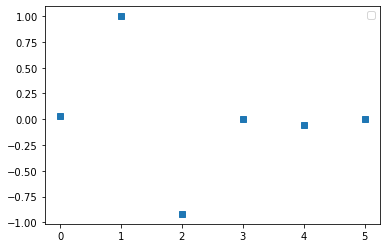

In [17]:
import matplotlib.pyplot as plt
plt.plot(lr.coef_, 's')
plt.legend()
plt.savefig('lr-coef.png')
plt.show()